In [2]:
# !pip install numpy
# !pip install pandas
# !pip install keras
# !pip install graphviz
# !pip install pydot

In [2]:
import numpy as np
np.random.seed(42) # for reproducibility
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
%matplotlib inline  
import app_utils as u
from imp import reload
reload(u);

/Users/mabbas/tf3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df_train,df_val,categories = u.read_dbpedia_data()

In [4]:
#Load Glove 50-d embeddings
embeddings,word_index = u.load_embeddings()

In [5]:
#Prepare the data for the model
x_train,y_train,x_val,y_val = u.prepare_data_from_full_word_index(df_train,df_val,categories,word_index)

In [6]:
print(x_train.shape,y_train.shape)

(560000, 20) (560000, 14)


In [7]:
# Get the embedding matrix for the model, build model, display model summary
embedding_matrix = u.get_embedding_matrix_for_model(embeddings,word_index)
model = u.build_model(embedding_matrix,categories)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 64)            29440     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                910       
Total params: 20,067,584
Trainable params: 67,534
Non-trainable params: 20,000,050
_________________________________________________________________


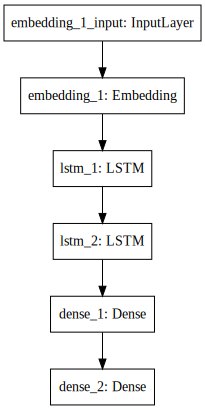

In [8]:
# Display the Model
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:
# Train the model, record history
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Train on 560000 samples, validate on 70000 samples
Epoch 1/5
560000/560000 [==============================] - 101s 180us/step - loss: 0.7977 - acc: 0.7484 - val_loss: 0.5406 - val_acc: 0.8280
Epoch 2/5
560000/560000 [==============================] - 99s 176us/step - loss: 0.4888 - acc: 0.8420 - val_loss: 0.4621 - val_acc: 0.8512
Epoch 3/5
560000/560000 [==============================] - 95s 170us/step - loss: 0.4318 - acc: 0.8604 - val_loss: 0.4221 - val_acc: 0.8638
Epoch 4/5
560000/560000 [==============================] - 96s 171us/step - loss: 0.4009 - acc: 0.8705 - val_loss: 0.3994 - val_acc: 0.8716
Epoch 5/5
560000/560000 [==============================] - 97s 173us/step - loss: 0.3809 - acc: 0.8764 - val_loss: 0.3865 - val_acc: 0.8766


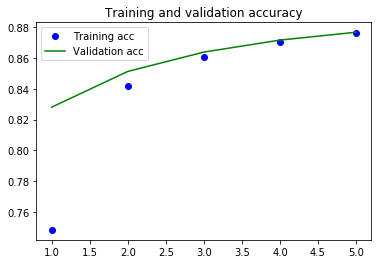

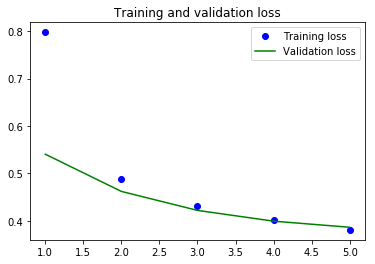

In [10]:
# This plot suggests there is still value in the data that has not been exploited. 
# (We want to get to a stage where we overfit first, and then regularize down)
u.make_history_plot(history)

In [15]:
# Make and analyze validation predictions
val_predictions = u.one_hot_to_category_idx(model.predict(x_val))

In [16]:
conf_mat = confusion_matrix(list(df_val.category.values-1),val_predictions)
print(conf_mat)

[[3893   99   55   14   72  256  147   35    4   14   30  124   61  196]
 [  97 4500   17   15   83    8  165   33   14    3    9    1   10   45]
 [ 158   44 3428   39  267   26   76    4    2    8    9  412  168  359]
 [  15   23   62 4713   88   27    7    0    1   25    3    4   20   12]
 [  62   39  112   33 4607   46   34    5    1    4    3    1    8   45]
 [ 109   12    9    8   30 4700   53   26    4   16   11    2   11    9]
 [ 182  185   29    6   95   85 4178   82   45   13   16    7   18   59]
 [  26   33    3    0   15   57  115 4519  107   56   49    4    3   13]
 [  10   21    4    2   18    7   48   45 4831    4    2    2    1    5]
 [  10    1    2   20    3   10    7   32    5 4547  356    0    2    5]
 [  26    5    3    0    1    6   11   33    2  222 4671    2    2   16]
 [  70    4  128    7    6   19   11    3    0    5    4 4584   88   71]
 [  57   12   69   10   24   32   27   10    4    6    7  127 4282  333]
 [ 203   65  117   12   91   55   65   21    4   23

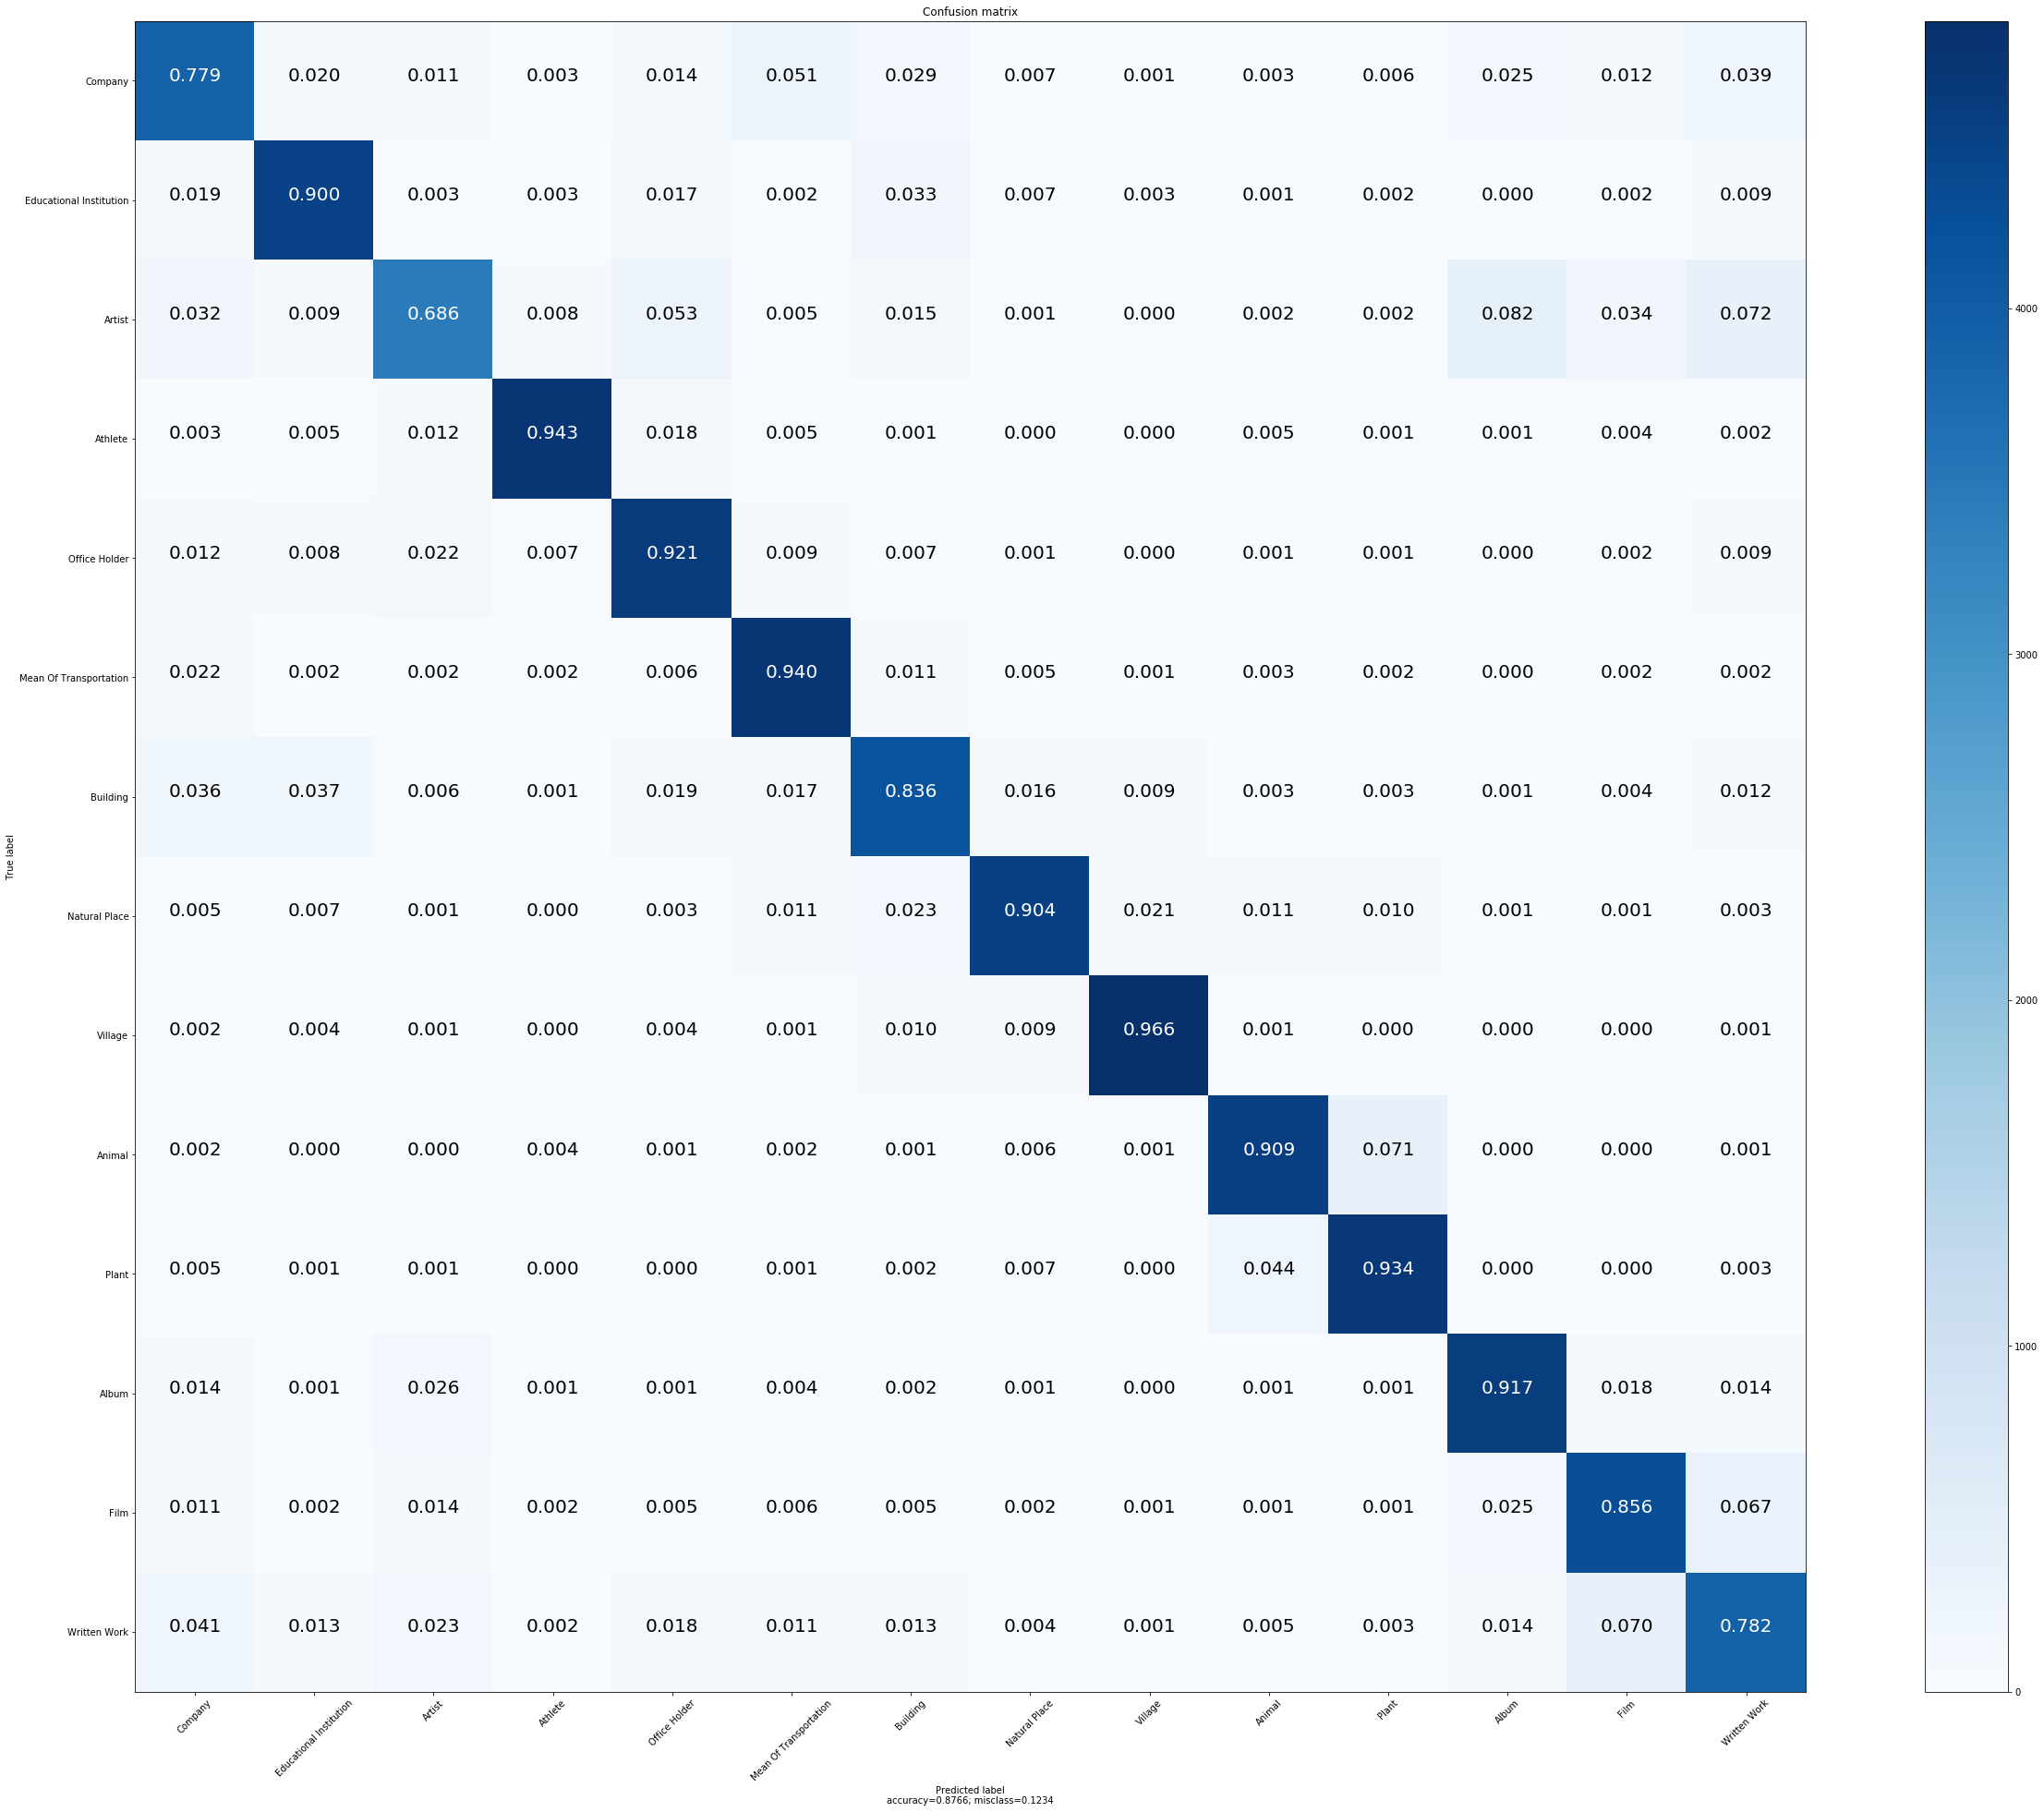

In [17]:
u.plot_confusion_matrix(conf_mat,target_names=categories,normalize=True)

In [18]:
print(classification_report(list(df_val.category.values-1), val_predictions, None, categories))

                         precision    recall  f1-score   support

                Company       0.79      0.78      0.79      5000
Educational Institution       0.89      0.90      0.90      5000
                 Artist       0.85      0.69      0.76      5000
                Athlete       0.97      0.94      0.95      5000
          Office Holder       0.85      0.92      0.89      5000
 Mean Of Transportation       0.88      0.94      0.91      5000
               Building       0.85      0.84      0.84      5000
          Natural Place       0.93      0.90      0.92      5000
                Village       0.96      0.97      0.96      5000
                 Animal       0.92      0.91      0.91      5000
                  Plant       0.90      0.93      0.92      5000
                  Album       0.86      0.92      0.89      5000
                   Film       0.85      0.86      0.85      5000
           Written Work       0.77      0.78      0.78      5000

            avg / total